# Uncertainty Experiment Evaluation

## Proactive Experiment

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [22]:
file_proactive = "C:\\Users\\ReneKB\\iCloudDrive\\Studium\\Master\\Masterthesis\\Wichtige Ergebnisse\\Proactive\\n0_UncertaintyProactiveExperiment_2022-01-21_00-40-25.csv"
file_predictive = "C:\\Users\\ReneKB\\iCloudDrive\\Studium\\Master\\Masterthesis\\Wichtige Ergebnisse\\Predictive\\n0_UncertaintyPredictiveExperiment_2022-01-21_10-04-27.csv"
file_proactive_reactive = "C:\\Users\\ReneKB\\iCloudDrive\\Studium\\Master\\Masterthesis\\Wichtige Ergebnisse\\Reactive\\m2_UncertaintyReactiveExperiment_2022-01-22_19-37-19.csv"

In [23]:
df_proactive_frame = pd.read_csv(file_proactive).drop(['robustness', 'robustness_uncertainty', 'robustness_measure'], axis=1)
df_proactive_frame['makespan_std'] = df_proactive_frame['makespan'] - df_proactive_frame['makespan-optimum']
df_proactive_frame['makespan_uncertainty_std'] = df_proactive_frame['makespan_uncertainty'] - df_proactive_frame['makespan-optimum']
df_proactive_frame['makespan_uncertainty_baseline_delay'] = df_proactive_frame['makespan_uncertainty_std'] - df_proactive_frame['makespan_std']
list_ordering = {"RandomSolver": 0, "HillClimbing": 1, "TabuSearch": 2, "SimulatedAnnealing": 3, "GeneticAlgorithm": 4}
df_proactive_frame["solver"] = pd.Categorical(df_proactive_frame["solver"], categories=list_ordering)
df_proactive_frame.head(100)

,benchmark,solver,iterations,makespan-optimum,makespan,uncertainty_percentage,makespan_uncertainty,makespan_std,makespan_uncertainty_std,makespan_uncertainty_baseline_delay
0,n0.mm/n010_1.mm,GeneticAlgorithm,2500,19.0,19,0.0,19,0.0,0.0,0.0
1,n0.mm/n010_1.mm,GeneticAlgorithm,2500,19.0,19,0.0,19,0.0,0.0,0.0
2,n0.mm/n010_1.mm,GeneticAlgorithm,2500,19.0,19,0.0,19,0.0,0.0,0.0
3,n0.mm/n010_1.mm,GeneticAlgorithm,2500,19.0,19,0.0,19,0.0,0.0,0.0
4,n0.mm/n010_1.mm,GeneticAlgorithm,2500,19.0,19,0.0,19,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
95,n0.mm/n010_1.mm,GeneticAlgorithm,2500,19.0,19,0.0,19,0.0,0.0,0.0
96,n0.mm/n010_1.mm,GeneticAlgorithm,2500,19.0,19,0.0,19,0.0,0.0,0.0
97,n0.mm/n010_1.mm,GeneticAlgorithm,2500,19.0,19,0.0,19,0.0,0.0,0.0
98,n0.mm/n010_1.mm,GeneticAlgorithm,2500,19.0,19,0.0,19,0.0,0.0,0.0


In [24]:
df_grouped_proactive = df_proactive_frame.groupby(['uncertainty_percentage'])
df_grouped_proactive_solver_iterations = df_proactive_frame.groupby(['uncertainty_percentage', 'solver', 'iterations'])['makespan_uncertainty_std']


### Significance Calculation

In [25]:
list = []
df_grouped_proactive_solver_iterations.apply(lambda df: list.append(df))
freiheitsgrad = len(list) - 1
print("Freiheitsgrad:", freiheitsgrad)

stats.kruskal(*list)

Freiheitsgrad: 79


KruskalResult(statistic=442746.144110954, pvalue=0.0)

In [26]:
proactive_describe = df_grouped_proactive_solver_iterations.describe()[['mean', 'std']]

# print(proactive_describe.to_latex(float_format="{:0.2f}".format))
blub = proactive_describe.reset_index().set_index(['solver', 'iterations'])
blub.pivot(columns='uncertainty_percentage')

mean                                \
uncertainty_percentage             0.00      0.05      0.10      0.20   
solver             iterations                                           
RandomSolver       500         4.475694  5.303194  6.059306  7.507639   
                   1000        3.819444  4.633958  5.402083  6.783125   
                   2500        3.090278  3.950417  4.708750  6.147500   
                   5000        2.618056  3.458125  4.215625  5.667292   
HillClimbing       500         3.194444  4.145486  4.969028  6.438750   
                   1000        3.208333  4.209028  5.072778  6.524028   
                   2500        3.305556  4.280903  5.114375  6.693750   
                   5000        3.111111  4.096250  4.943056  6.466111   
TabuSearch         500         1.013889  1.937083  2.714583  4.223472   
                   1000        0.572917  1.468750  2.261111  3.702222   
                   2500        0.236111  1.171319  1.969861  3.441528   
                   5000        0.118056  1.073819  1.877292  3.329861   
SimulatedAnnealing 500         1.972222  2.875903  3.672292  5.128542   
                   1000        1.045139  1.967222  2.765278  4.214722   
                   2500        0.420139  1.318681  2.106875  3.571944   
                   5000        0.236111  1.167431  1.983819  3.477083   
GeneticAlgorithm   500         0.569444  1.376944  2.141528  3.536875   
                   1000        0.260417  1.094375  1.834167  3.280278   
                   2500        0.159722  0.988264  1.753194  3.176319   
                   5000        0.131944  0.965694  1.701736  3.145486   

                                    std                                
uncertainty_percentage             0.00      0.05      0.10      0.20  
solver             iterations                                          
RandomSolver       500         3.236102  3.576923  3.845706  4.287834  
                   1000        3.072503  3.481197  3.803949  4.167675  
                   2500        2.811071  3.288779  3.550558  4.083532  
                   5000        2.624751  2.968510  3.263095  3.726285  
HillClimbing       500         3.694677  4.126281  4.436104  4.853761  
                   1000        3.897027  4.435326  4.808000  5.198910  
                   2500        3.836686  4.376991  4.627905  5.141119  
                   5000        3.691543  4.199688  4.545281  5.045632  
TabuSearch         500         1.850312  2.476320  2.803653  3.375219  
                   1000        1.315642  1.953234  2.309334  2.800880  
                   2500        0.726376  1.737283  2.127228  2.614112  
                   5000        0.448726  1.538418  1.928404  2.384423  
SimulatedAnnealing 500         2.600690  3.082553  3.399286  3.804288  
                   1000        1.807083  2.332261  2.668252  3.050038  
                   2500        1.118326  1.723561  2.038836  2.558700  
                   5000        0.697103  1.467980  1.851851  2.305726  
GeneticAlgorithm   500         1.194082  1.722984  2.073876  2.536660  
                   1000        0.665305  1.386509  1.743301  2.253236  
                   2500        0.458928  1.252902  1.664073  2.167340  
                   5000        0.444840  1.238407  1.583387  2.095508

In [27]:
print(blub.pivot(columns='uncertainty_percentage').to_latex(float_format="{:0.2f}".format))

\begin{tabular}{llrrrrrrrr}
\toprule
                 & {} & \multicolumn{4}{l}{mean} & \multicolumn{4}{l}{std} \\
                 & uncertainty\_percentage & 0.00 & 0.05 & 0.10 & 0.20 & 0.00 & 0.05 & 0.10 & 0.20 \\
solver & iterations &      &      &      &      &      &      &      &      \\
\midrule
RandomSolver & 500  & 4.48 & 5.30 & 6.06 & 7.51 & 3.24 & 3.58 & 3.85 & 4.29 \\
                 & 1000 & 3.82 & 4.63 & 5.40 & 6.78 & 3.07 & 3.48 & 3.80 & 4.17 \\
                 & 2500 & 3.09 & 3.95 & 4.71 & 6.15 & 2.81 & 3.29 & 3.55 & 4.08 \\
                 & 5000 & 2.62 & 3.46 & 4.22 & 5.67 & 2.62 & 2.97 & 3.26 & 3.73 \\
HillClimbing & 500  & 3.19 & 4.15 & 4.97 & 6.44 & 3.69 & 4.13 & 4.44 & 4.85 \\
                 & 1000 & 3.21 & 4.21 & 5.07 & 6.52 & 3.90 & 4.44 & 4.81 & 5.20 \\
                 & 2500 & 3.31 & 4.28 & 5.11 & 6.69 & 3.84 & 4.38 & 4.63 & 5.14 \\
                 & 5000 & 3.11 & 4.10 & 4.94 & 6.47 & 3.69 & 4.20 & 4.55 & 5.05 \\
TabuSearch & 500  & 1.01 & 1.94 & 2.71 

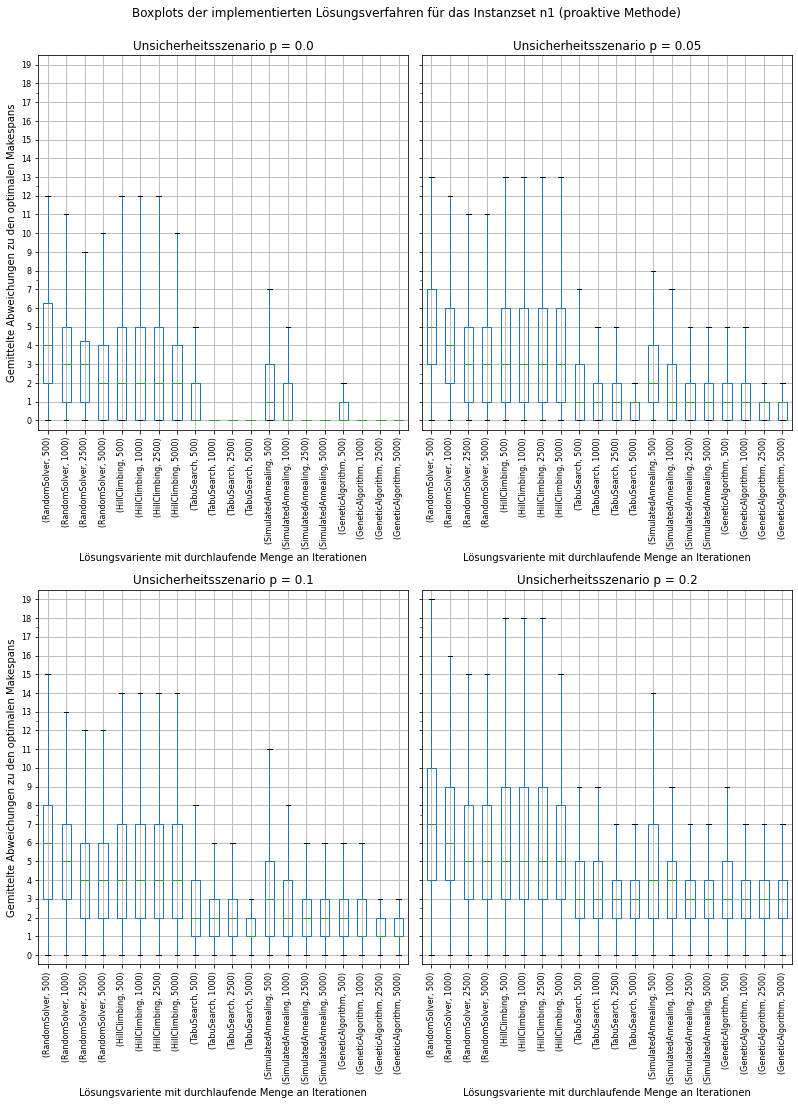

In [28]:
# plt.title("Boxplots der implementierten Lösungsverfahren für das Instanzset n1 (proaktive Methode)")
boxplot = df_grouped_proactive.boxplot(column="makespan_uncertainty_std", by=['solver', 'iterations'], showfliers=False, rot=90, fontsize=8, figsize=(11, 15))
plt.ylim(-0.5, 19.5)
plt.yticks(np.arange(0, 19.5, step=1))
plt.tight_layout()
plt.suptitle("Boxplots der implementierten Lösungsverfahren für das Instanzset n1 (proaktive Methode)", y=1.02)

for i, v in boxplot.items():
    boxplot[i].set_title("Unsicherheitsszenario p = " + boxplot[i].get_title())
    boxplot[i].set_xlabel("Lösungsvariente mit durchlaufende Menge an Iterationen")
    boxplot[i].set_ylabel("Gemittelte Abweichungen zu den optimalen Makespans")
plt.show()

## Predictive Experiment

In [29]:
df_predictive_frame = pd.read_csv(file_predictive).drop(['robustness', 'robustness_uncertainty', 'robustness_measure'], axis=1)
df_predictive_frame['makespan_std'] = df_predictive_frame['makespan'] - df_predictive_frame['makespan-optimum']
df_predictive_frame['makespan_uncertainty_std'] = df_predictive_frame['makespan_uncertainty'] - df_predictive_frame['makespan-optimum']
df_predictive_frame['makespan_uncertainty_baseline_delay'] = df_predictive_frame['makespan_uncertainty_std'] - df_predictive_frame['makespan_std']
list_ordering = {"RandomSolver": 0, "HillClimbing": 1, "TabuSearch": 2, "SimulatedAnnealing": 3, "GeneticAlgorithm": 4}
df_predictive_frame["solver"] = pd.Categorical(df_predictive_frame["solver"], categories=list_ordering)
df_predictive_frame.head(20)

,benchmark,solver,iterations,makespan-optimum,makespan,uncertainty_percentage,makespan_uncertainty,makespan_std,makespan_uncertainty_std,makespan_uncertainty_baseline_delay
0,n0.mm/n010_1.mm,GeneticAlgorithm,2500,19.0,19,0.0,19,0.0,0.0,0.0
1,n0.mm/n010_1.mm,GeneticAlgorithm,2500,19.0,19,0.0,19,0.0,0.0,0.0
2,n0.mm/n010_1.mm,GeneticAlgorithm,2500,19.0,19,0.0,19,0.0,0.0,0.0
3,n0.mm/n010_1.mm,GeneticAlgorithm,2500,19.0,19,0.0,19,0.0,0.0,0.0
4,n0.mm/n010_1.mm,GeneticAlgorithm,2500,19.0,19,0.0,19,0.0,0.0,0.0
5,n0.mm/n010_1.mm,GeneticAlgorithm,2500,19.0,19,0.0,19,0.0,0.0,0.0
6,n0.mm/n010_1.mm,GeneticAlgorithm,2500,19.0,19,0.0,19,0.0,0.0,0.0
7,n0.mm/n010_1.mm,GeneticAlgorithm,2500,19.0,19,0.0,19,0.0,0.0,0.0
8,n0.mm/n010_1.mm,GeneticAlgorithm,2500,19.0,19,0.0,19,0.0,0.0,0.0
9,n0.mm/n010_1.mm,GeneticAlgorithm,2500,19.0,19,0.0,19,0.0,0.0,0.0


In [30]:
df_grouped_predictive = df_predictive_frame.groupby(['uncertainty_percentage'])
df_grouped_predictive_solver_iterations = df_predictive_frame.groupby(['uncertainty_percentage', 'solver', 'iterations'])['makespan_uncertainty_std']

### Significance Test

In [31]:

list = []
df_grouped_predictive_solver_iterations.apply(lambda df: list.append(df))
freiheitsgrad = len(list) - 1
print("Freiheitsgrad:", freiheitsgrad)

stats.kruskal(*list)

Freiheitsgrad: 79


KruskalResult(statistic=443718.05249983363, pvalue=0.0)

In [32]:
predictive_describe = df_grouped_predictive_solver_iterations.describe()[['mean', 'std']]

# print(proactive_describe.to_latex(float_format="{:0.2f}".format))
blub = predictive_describe.reset_index().set_index(['solver', 'iterations'])
uncertainty_describe = blub.pivot(columns='uncertainty_percentage')
uncertainty_describe

mean                                \
uncertainty_percentage             0.00      0.05      0.10      0.20   
solver             iterations                                           
RandomSolver       500         4.479167  5.261667  5.993125  7.365417   
                   1000        3.888889  4.617708  5.333750  6.731944   
                   2500        3.104167  3.893056  4.619861  5.993542   
                   5000        2.586806  3.417917  4.151458  5.621597   
HillClimbing       500         1.340278  2.149306  2.890278  4.373264   
                   1000        1.468750  2.277500  3.014861  4.476181   
                   2500        1.250000  2.007014  2.751250  4.198125   
                   5000        1.121528  1.903264  2.663333  4.066389   
TabuSearch         500         0.718750  1.545764  2.293264  3.720764   
                   1000        0.388889  1.222500  1.983611  3.442778   
                   2500        0.281250  1.063681  1.802569  3.200417   
                   5000        0.100694  0.934861  1.661875  3.114375   
SimulatedAnnealing 500         1.670139  2.445833  3.177222  4.556389   
                   1000        0.784722  1.557847  2.312431  3.662500   
                   2500        0.357639  1.155278  1.920833  3.355972   
                   5000        0.173611  0.911389  1.681944  3.066250   
GeneticAlgorithm   500         0.565972  1.354861  2.116736  3.522847   
                   1000        0.236111  0.971736  1.710764  3.075833   
                   2500        0.187500  0.959236  1.721875  3.116875   
                   5000        0.121528  0.898681  1.605347  3.011806   

                                    std                                
uncertainty_percentage             0.00      0.05      0.10      0.20  
solver             iterations                                          
RandomSolver       500         3.380964  3.740637  3.989171  4.394682  
                   1000        3.148326  3.446802  3.686288  4.112719  
                   2500        2.936272  3.250917  3.490775  3.911128  
                   5000        2.522095  2.974099  3.311298  3.855335  
HillClimbing       500         2.312977  2.913182  3.286731  3.897042  
                   1000        2.517884  3.104933  3.413723  3.945949  
                   2500        2.327454  2.818420  3.108664  3.713746  
                   5000        2.089020  2.538409  2.867588  3.343212  
TabuSearch         500         1.631155  2.304482  2.641884  3.097689  
                   1000        1.014590  1.791382  2.167898  2.731151  
                   2500        0.821229  1.498352  1.893030  2.371228  
                   5000        0.441288  1.447195  1.835757  2.396444  
SimulatedAnnealing 500         2.389050  2.808935  3.035312  3.481622  
                   1000        1.498492  2.107629  2.510031  2.878658  
                   2500        0.917008  1.644425  2.087165  2.653775  
                   5000        0.575320  1.249180  1.665418  2.141446  
GeneticAlgorithm   500         1.170787  1.886579  2.242267  2.796629  
                   1000        0.629021  1.312579  1.703901  2.230785  
                   2500        0.520017  1.323212  1.724498  2.215871  
                   5000        0.402897  1.211595  1.581066  2.076293

In [33]:
print(uncertainty_describe.to_latex(float_format="{:0.2f}".format))

\begin{tabular}{llrrrrrrrr}
\toprule
                 & {} & \multicolumn{4}{l}{mean} & \multicolumn{4}{l}{std} \\
                 & uncertainty\_percentage & 0.00 & 0.05 & 0.10 & 0.20 & 0.00 & 0.05 & 0.10 & 0.20 \\
solver & iterations &      &      &      &      &      &      &      &      \\
\midrule
RandomSolver & 500  & 4.48 & 5.26 & 5.99 & 7.37 & 3.38 & 3.74 & 3.99 & 4.39 \\
                 & 1000 & 3.89 & 4.62 & 5.33 & 6.73 & 3.15 & 3.45 & 3.69 & 4.11 \\
                 & 2500 & 3.10 & 3.89 & 4.62 & 5.99 & 2.94 & 3.25 & 3.49 & 3.91 \\
                 & 5000 & 2.59 & 3.42 & 4.15 & 5.62 & 2.52 & 2.97 & 3.31 & 3.86 \\
HillClimbing & 500  & 1.34 & 2.15 & 2.89 & 4.37 & 2.31 & 2.91 & 3.29 & 3.90 \\
                 & 1000 & 1.47 & 2.28 & 3.01 & 4.48 & 2.52 & 3.10 & 3.41 & 3.95 \\
                 & 2500 & 1.25 & 2.01 & 2.75 & 4.20 & 2.33 & 2.82 & 3.11 & 3.71 \\
                 & 5000 & 1.12 & 1.90 & 2.66 & 4.07 & 2.09 & 2.54 & 2.87 & 3.34 \\
TabuSearch & 500  & 0.72 & 1.55 & 2.29 

C:\Users\ReneKB\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


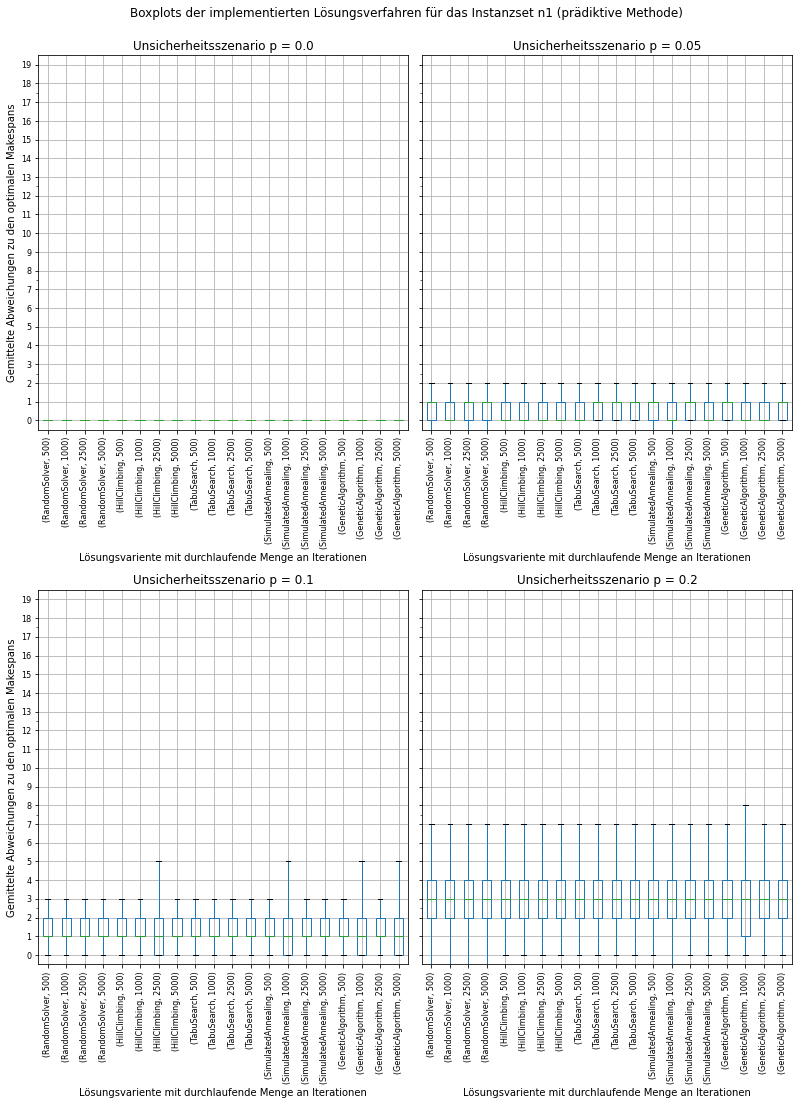

In [34]:
boxplot = df_grouped_predictive.boxplot(column="makespan_uncertainty_baseline_delay", by=['solver', 'iterations'], showfliers=False, rot=90, fontsize=8, figsize=(11, 15))

plt.ylim(-0.5, 19.5)
plt.yticks(np.arange(0, 19.5, step=1))
plt.tight_layout()
plt.suptitle("Boxplots der implementierten Lösungsverfahren für das Instanzset n1 (prädiktive Methode)", y=1.02)

for i, v in boxplot.items():
    boxplot[i].set_title("Unsicherheitsszenario p = " + boxplot[i].get_title())
    boxplot[i].set_xlabel("Lösungsvariente mit durchlaufende Menge an Iterationen")
    boxplot[i].set_ylabel("Gemittelte Abweichungen zu den optimalen Makespans")

boxplot[0].get_figure().show()

## Comparison to Proactive

In [35]:
results_proactive = {}
results_predictive = {}

results_test = {}

def assign(dict, df, uncertainty_entry, iteration_entry):
    dict[uncertainty_entry][iteration_entry].append(df) 

for uncertainty_entry in df_proactive_frame['uncertainty_percentage'].unique():
    results_proactive[uncertainty_entry] = {}
    results_predictive[uncertainty_entry] = {}
    results_test[uncertainty_entry] = {}

    for iteration_entry in sorted(df_proactive_frame['iterations'].unique()):
        results_proactive[uncertainty_entry][iteration_entry] = []
        results_predictive[uncertainty_entry][iteration_entry] = []
        df_proactive_frame[(df_proactive_frame['iterations'] == iteration_entry) & (df_proactive_frame['uncertainty_percentage'] == uncertainty_entry) & (df_proactive_frame['solver'] == 'GeneticAlgorithm')]['makespan_uncertainty_std'].apply(lambda df: assign(results_proactive, df, uncertainty_entry, iteration_entry))
        df_predictive_frame[(df_predictive_frame['iterations'] == iteration_entry) & (df_predictive_frame['uncertainty_percentage'] == uncertainty_entry) & (df_predictive_frame['solver'] == 'GeneticAlgorithm')]['makespan_uncertainty_std'].apply(lambda df: assign(results_predictive, df, uncertainty_entry, iteration_entry))

#for uncertainty_entry in results_proactive:
#    for iteration_entry in results_proactive[uncertainty_entry]:
#        results_test[uncertainty_entry][iteration_entry] = stats.mannwhitneyu(results_proactive[uncertainty_entry][iteration_entry], results_predictive[uncertainty_entry][iteration_entry])


In [36]:
results_test

{0.0: {}, 0.05: {}, 0.1: {}, 0.2: {}}

## Proactive-Reactive

In [37]:
df_pro_reactive_frame = pd.read_csv(file_proactive_reactive).drop(['robustness', 'robustness_uncertainty', 'robustness_measure'], axis=1)
df_pro_reactive_frame['makespan_std'] = df_pro_reactive_frame['makespan'] - df_pro_reactive_frame['makespan-optimum']
df_pro_reactive_frame['makespan_uncertainty_std'] = df_pro_reactive_frame['makespan_uncertainty'] - df_pro_reactive_frame['makespan-optimum']
list_ordering = {"RandomSolver": 0, "HillClimbing": 1, "TabuSearch": 2, "SimulatedAnnealing": 3, "GeneticAlgorithm": 4}
df_pro_reactive_frame["solver"] = pd.Categorical(df_pro_reactive_frame["solver"], categories=list_ordering)
df_pro_reactive_frame.head(20)

,benchmark,solver,iterations,makespan-optimum,makespan,uncertainty_percentage,makespan_uncertainty,makespan_std,makespan_uncertainty_std
0,m2.mm/m210_1.mm,GeneticAlgorithm,2500,34.0,38,0.0,38,4.0,4.0
1,m2.mm/m210_1.mm,GeneticAlgorithm,2500,34.0,38,0.0,38,4.0,4.0
2,m2.mm/m210_1.mm,GeneticAlgorithm,2500,34.0,38,0.0,38,4.0,4.0
3,m2.mm/m210_1.mm,GeneticAlgorithm,2500,34.0,38,0.0,38,4.0,4.0
4,m2.mm/m210_1.mm,GeneticAlgorithm,2500,34.0,34,0.0,34,0.0,0.0
5,m2.mm/m210_1.mm,GeneticAlgorithm,2500,34.0,38,0.0,38,4.0,4.0
6,m2.mm/m210_1.mm,GeneticAlgorithm,2500,34.0,38,0.0,38,4.0,4.0
7,m2.mm/m210_1.mm,GeneticAlgorithm,2500,34.0,38,0.0,38,4.0,4.0
8,m2.mm/m210_1.mm,GeneticAlgorithm,2500,34.0,38,0.0,38,4.0,4.0
9,m2.mm/m210_1.mm,GeneticAlgorithm,2500,34.0,38,0.0,38,4.0,4.0


In [38]:
df_grouped_pro_reactive = df_pro_reactive_frame.groupby(['uncertainty_percentage'])
df_grouped_pro_reactive_solver_iterations = df_pro_reactive_frame.groupby(['uncertainty_percentage', 'solver', 'iterations'])['makespan_uncertainty_std']

In [39]:
pro_reactive_describe = df_grouped_pro_reactive_solver_iterations.describe()[['mean', 'std']]

# print(proactive_describe.to_latex(float_format="{:0.2f}".format))
blub = pro_reactive_describe.reset_index().set_index(['solver', 'iterations'])
uncertainty_describe = blub.pivot(columns='uncertainty_percentage')
uncertainty_describe

mean                                \
uncertainty_percentage             0.00      0.05      0.10      0.20   
solver             iterations                                           
RandomSolver       500         2.802083  3.361979  3.924479  4.996528   
                   1000        2.218750  2.809896  3.348090  4.562500   
                   2500        1.937500  2.519097  3.158854  4.335069   
                   5000        1.260417  1.984375  2.618056  3.921007   
HillClimbing       500         2.867347  3.478741  4.089286  5.207483   
                   1000        3.071429  3.713435  4.234694  5.340986   
                   2500        2.989796  3.670068  4.200680  5.315476   
                   5000        2.734694  3.364796  3.930272  4.988946   
TabuSearch         500         1.224490  1.938776  2.676871  3.917517   
                   1000        0.928571  1.715986  2.437075  3.836735   
                   2500        0.836735  1.630952  2.380952  3.737245   
                   5000        0.510204  1.308673  2.022959  3.450680   
SimulatedAnnealing 500         1.755102  2.511054  3.099490  4.319728   
                   1000        1.183673  1.939626  2.613946  3.858844   
                   2500        0.724490  1.545918  2.157313  3.562075   
                   5000        0.469388  1.238946  2.003401  3.318027   
GeneticAlgorithm   500         1.326531  1.994048  2.579932  3.987245   
                   1000        0.612245  1.344388  2.056973  3.356293   
                   2500        0.306122  1.053571  1.784864  3.139456   
                   5000        0.387755  1.184524  1.886054  3.230442   

                                    std                                
uncertainty_percentage             0.00      0.05      0.10      0.20  
solver             iterations                                          
RandomSolver       500         3.065301  3.152655  3.374977  3.651403  
                   1000        2.600019  2.766526  2.824034  2.985848  
                   2500        2.432673  2.579674  2.685342  2.699014  
                   5000        1.728253  2.000373  2.148676  2.528003  
HillClimbing       500         3.377939  3.417037  3.600665  3.528049  
                   1000        3.556474  3.573475  3.504310  3.505893  
                   2500        3.475859  3.544007  3.602439  3.564835  
                   5000        3.213433  3.270305  3.283781  3.225808  
TabuSearch         500         1.676048  1.922674  2.140036  2.360851  
                   1000        1.560687  1.940638  2.035712  2.417428  
                   2500        1.550471  1.978143  2.152353  2.381097  
                   5000        1.214759  1.658236  1.786565  2.175519  
SimulatedAnnealing 500         2.144060  2.353423  2.431243  2.574471  
                   1000        1.781304  2.061339  2.171524  2.547684  
                   2500        1.308153  1.674723  1.798320  2.235396  
                   5000        1.052211  1.585535  1.703560  2.187208  
GeneticAlgorithm   500         1.743221  1.981823  2.094062  2.470388  
                   1000        1.140057  1.449732  1.769044  2.039131  
                   2500        0.720399  1.182002  1.524431  1.794348  
                   5000        0.954801  1.467074  1.611853  1.892550

In [40]:
print(uncertainty_describe.to_latex(float_format="{:0.2f}".format))

\begin{tabular}{llrrrrrrrr}
\toprule
                 & {} & \multicolumn{4}{l}{mean} & \multicolumn{4}{l}{std} \\
                 & uncertainty\_percentage & 0.00 & 0.05 & 0.10 & 0.20 & 0.00 & 0.05 & 0.10 & 0.20 \\
solver & iterations &      &      &      &      &      &      &      &      \\
\midrule
RandomSolver & 500  & 2.80 & 3.36 & 3.92 & 5.00 & 3.07 & 3.15 & 3.37 & 3.65 \\
                 & 1000 & 2.22 & 2.81 & 3.35 & 4.56 & 2.60 & 2.77 & 2.82 & 2.99 \\
                 & 2500 & 1.94 & 2.52 & 3.16 & 4.34 & 2.43 & 2.58 & 2.69 & 2.70 \\
                 & 5000 & 1.26 & 1.98 & 2.62 & 3.92 & 1.73 & 2.00 & 2.15 & 2.53 \\
HillClimbing & 500  & 2.87 & 3.48 & 4.09 & 5.21 & 3.38 & 3.42 & 3.60 & 3.53 \\
                 & 1000 & 3.07 & 3.71 & 4.23 & 5.34 & 3.56 & 3.57 & 3.50 & 3.51 \\
                 & 2500 & 2.99 & 3.67 & 4.20 & 5.32 & 3.48 & 3.54 & 3.60 & 3.56 \\
                 & 5000 & 2.73 & 3.36 & 3.93 & 4.99 & 3.21 & 3.27 & 3.28 & 3.23 \\
TabuSearch & 500  & 1.22 & 1.94 & 2.68 